In [447]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lab 6 - Fisher's Linear Discriminant and Logistic Regression
- For equations, refer to Bishop's book, Section 4.1.4 and the slides

# Part I - Fisher's Linear Discriminant for Binary Classification (2 classes)

## Data Generation and Visualisation
- First we'll use scikit-learn to generate 2 blobs of data in 2D, using the [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function.
- The data consists of 600 points divided into 2 classes, 0 and 1.

In [448]:
from sklearn.datasets import make_blobs

In [449]:
x, y = make_blobs(n_samples=600, centers=2, n_features=2, random_state=0)

Let's confirm the data has two classes

In [450]:
np.unique(y)

array([0, 1])

## Exercise 1
- Now create a scatter plot to visualise the generated data. 
- Make sure to paint each point based on the class they belong to, as shown in the Figure below.

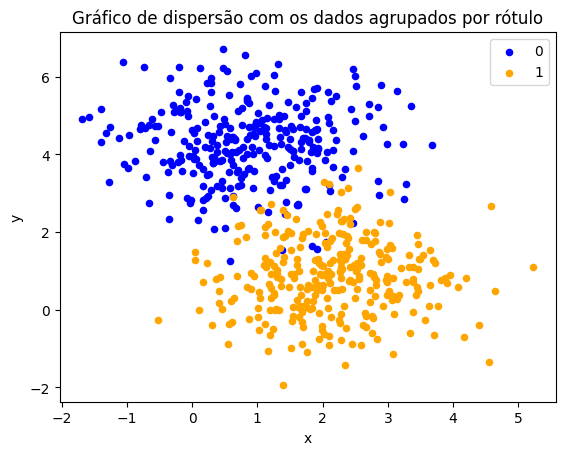

In [451]:
# Criando um DataFrame para melhor manipulação dos dados  
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))

# Definindo cores para as classes 
colors = {0:'blue', 1:'orange'}

# GRÁFICO 

# Definindo a figura
fig, ax = plt.subplots()

# Agrupando por rótulo   
grouped = df.groupby('label')

# Plotando um gráfico de dispersão para cada rótulo
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

#Colocando título no gráfico
plt.title('Gráfico de dispersão com os dados agrupados por rótulo')

# Mostrando o gráfico
plt.show()

## Exercise 2
* Now plot a histogram of the data projected on each of the 2 dimensions of $X$ ($0$ and $1$)

As an example, below is a figure that shows the projection on dimension $1$.

_Tips:_ 
* You can either use `histplot()` to generate the plot, in which case it might be easier to pack $X$ and $y$ into a pandas DataFrame.
* Alternatively, considering that you will generate this plot many times throughout this lab, you can write a function that takes the projected vector and the class labels.
* Use 30 bins to obtain a similar plot.

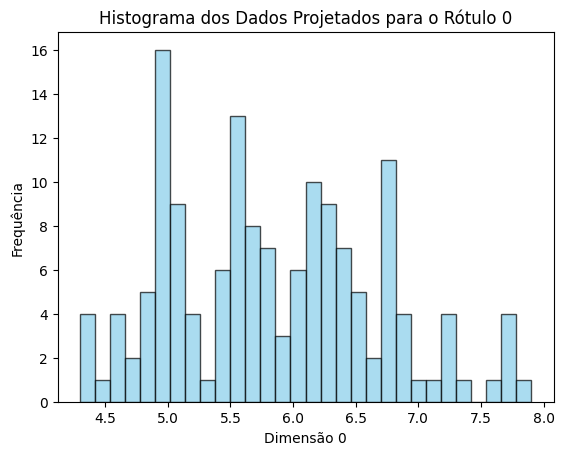

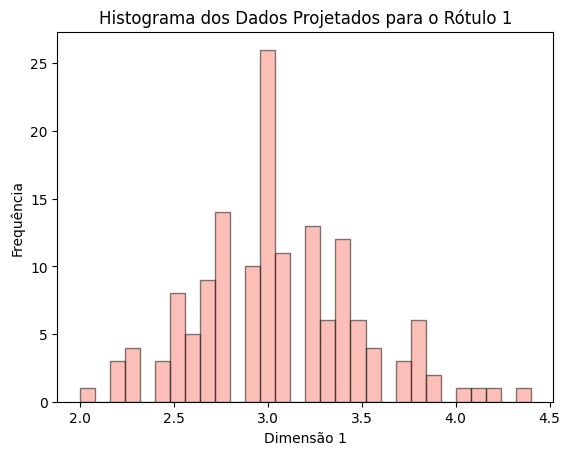

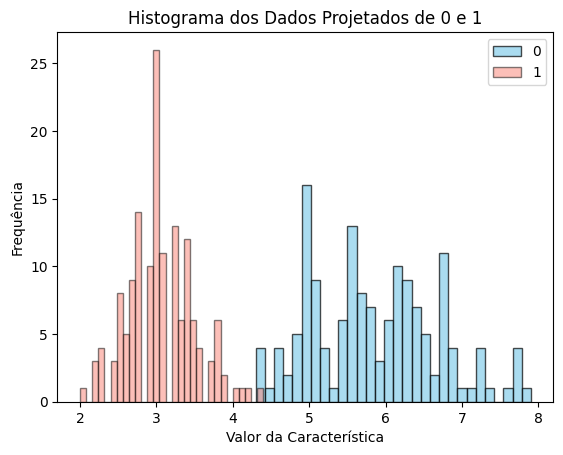

In [452]:
# Plotagem do histograma para o rótulo 0
plt.hist(X[:, 0], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('Dimensão 0')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados Projetados para o Rótulo 0')
plt.show()

# Plotagem do histograma para o rótulo 1
plt.hist(X[:, 1], bins=30, color='salmon', alpha=0.5, edgecolor='black')
plt.xlabel('Dimensão 1')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados Projetados para o Rótulo 1')
plt.show()

# Combinação dos dois histogramas em um único gráfico
plt.hist(X[:, 0], bins=30, color='skyblue', alpha=0.7, label='0', edgecolor='black')
plt.hist(X[:, 1], bins=30, color='salmon', alpha=0.5, label='1', edgecolor='black')
plt.xlabel('Valor da Característica')
plt.ylabel('Frequência')
plt.title('Histograma dos Dados Projetados de 0 e 1')
plt.legend()
plt.show()




## Exercise 3 - Implement Fisher's linear discriminant

* Use numpy to calculate $\vec{w}$.
* Plot the data (as you did in Exercise 1), and add a line on the direction of $\vec{w}$ (reference Figure below).
* Project the points onto the calculated vector, and plot the projection (as you did in Exercise 2) (reference Figure below).

In [453]:
# Cálculo das médias de cada classe
mean_class_0 = np.mean(x[y == 0], axis=0)
mean_class_1 = np.mean(x[y == 1], axis=0)

# Cálculo das matrizes de dispersão dentro das classes
scatter_class_0 = np.cov(x[y == 0].T)
scatter_class_1 = np.cov(x[y == 1].T)

# Cálculo da matriz de dispersão entre as classes
overall_mean = np.mean(x, axis=0)
between_class_scatter = np.outer(mean_class_1 - mean_class_0, mean_class_1 - mean_class_0)

# Cálculo do vetor de discriminante linear de Fisher
w = np.linalg.inv(scatter_class_0 + scatter_class_1).dot(mean_class_1 - mean_class_0)


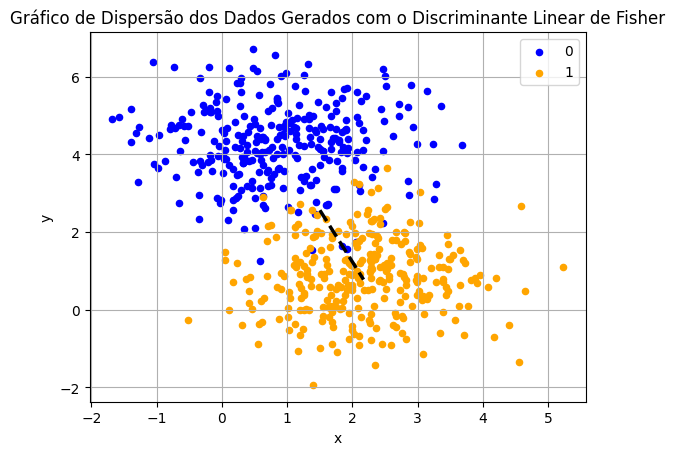

In [454]:
# Plotagem dos dados
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
plt.title("Gráfico de Dispersão dos Dados Gerados com o Discriminante Linear de Fisher")
plt.grid(True)

# Plotagem da direção de w: plota a linha tracejada com o comprimento e largura desejados
plt.plot([overall_mean[0], overall_mean[0] + w[0]], [overall_mean[1], overall_mean[1] + w[1]], linestyle='--', color='black', linewidth=2.5)


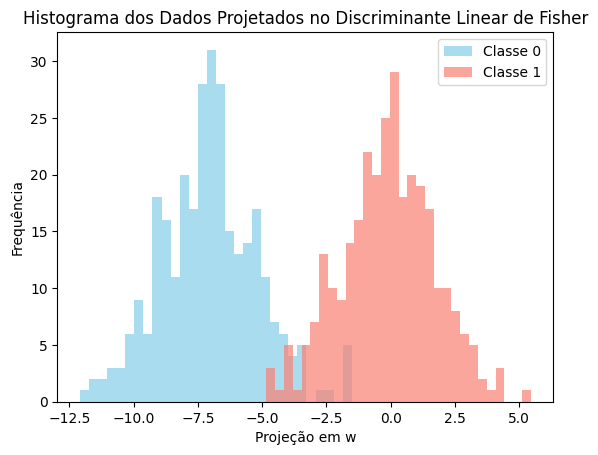

In [455]:
# Projetando os dados em w
projection = x.dot(w)

# Plotando o histograma da projeção
plt.figure()
plt.hist(projection[y == 0], bins=30, color='skyblue', alpha=0.7, label='Classe 0')
plt.hist(projection[y == 1], bins=30, color='salmon', alpha=0.7, label='Classe 1')
plt.xlabel('Projeção em w')
plt.ylabel('Frequência')
plt.title("Histograma dos Dados Projetados no Discriminante Linear de Fisher")
plt.legend()
plt.show()


## Exercise 4

* In this exercise you will use the `RidgeClassifier` from sklearn (as shown below) to obtain the class predictions from different types of projections:
    * component 0 of the data
    * component 1 of the data
    * the calculated vector $\vec{w}$
    
* Calculate the accuracy of these predictions using `accuracy_score` from sklearn.

In [456]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

In [457]:
# Classificador Ridge para fazer previsões
ridge_classifier = RidgeClassifier()

# 1. Previsões usando a componente 0 dos dados
x_component_0 = x[:, 0].reshape(-1, 1)  # Transformando em formato adequado para sklearn
ridge_classifier.fit(x_component_0, y)
predictions_component_0 = ridge_classifier.predict(x_component_0)
accuracy_component_0 = accuracy_score(y, predictions_component_0)

# 2. Previsões usando a componente 1 dos dados
x_component_1 = x[:, 1].reshape(-1, 1)  # Transformando em formato adequado para sklearn
ridge_classifier.fit(x_component_1, y)
predictions_component_1 = ridge_classifier.predict(x_component_1)
accuracy_component_1 = accuracy_score(y, predictions_component_1)

# 3. Previsões usando o vetor calculado w
ridge_classifier.fit(projection.reshape(-1, 1), y)
predictions_w = ridge_classifier.predict(projection.reshape(-1, 1))
accuracy_w = accuracy_score(y, predictions_w)

# Exibindo as precisões
print("Accuracy using component 0:", accuracy_component_0)
print("Accuracy using component 1:", accuracy_component_1)
print("Accuracy using vector w:", accuracy_w)


Accuracy using component 0: 0.7366666666666667
Accuracy using component 1: 0.955
Accuracy using vector w: 0.965


# Part II - Generalised Linear Discriminant (multi-class)

**NOTE:** For this part you will be using a multi-class estimator from scikit-learn (read the [documentation](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)).

## Exercise 1 - Generate data

* Generate a 3 classes dataset in 2D, with the same rules as before (make 300 points per class)
* Plot the data and then similar histograms (on each dimension) as Part I Exercises 1 and 2.

In [458]:
# Geração de um conjunto de dados de 3 classes em 2D
x_multi, y_multi = make_blobs(n_samples=900, centers=3, n_features=2, random_state=0)

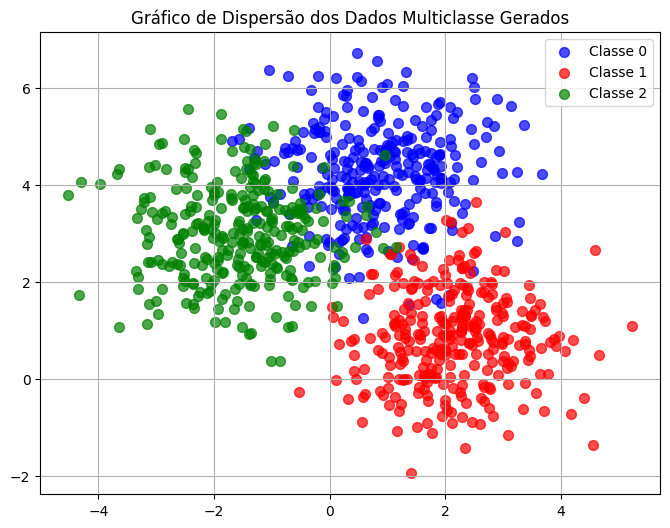

In [459]:
# Plotagem dos dados
plt.figure(figsize=(8, 6))

# Plotar cada classe separadamente com uma chamada de função scatter()
plt.scatter(x_multi[y_multi == 0][:, 0], x_multi[y_multi == 0][:, 1], c='blue', s=50, alpha=0.7, label='Classe 0')
plt.scatter(x_multi[y_multi == 1][:, 0], x_multi[y_multi == 1][:, 1], c='red', s=50, alpha=0.7, label='Classe 1')
plt.scatter(x_multi[y_multi == 2][:, 0], x_multi[y_multi == 2][:, 1], c='green', s=50, alpha=0.7, label='Classe 2')

plt.title('Gráfico de Dispersão dos Dados Multiclasse Gerados')
plt.legend()  # Mostra a legenda automaticamente
plt.grid(True)
plt.show()

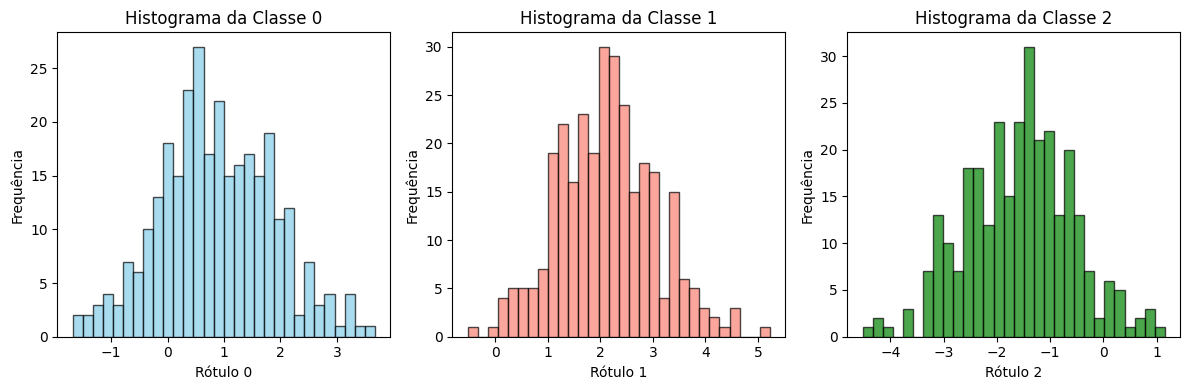

In [460]:
# Separa os dados por classe
x_class_0 = x_multi[y_multi == 0]
x_class_1 = x_multi[y_multi == 1]
x_class_2 = x_multi[y_multi == 2]

# Plotagem dos histogramas para cada classe
plt.figure(figsize=(12, 4))

# Histograma para a classe 0
plt.subplot(1, 3, 1)
plt.hist(x_class_0[:, 0], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('Rótulo 0')
plt.ylabel('Frequência')
plt.title('Histograma da Classe 0')

# Histograma para a classe 1
plt.subplot(1, 3, 2)
plt.hist(x_class_1[:, 0], bins=30, color='salmon', alpha=0.7, edgecolor='black')
plt.xlabel('Rótulo 1')
plt.ylabel('Frequência')
plt.title('Histograma da Classe 1')

# Histograma para a classe 2
plt.subplot(1, 3, 3)
plt.hist(x_class_2[:, 0], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Rótulo 2')
plt.ylabel('Frequência')
plt.title('Histograma da Classe 2')

plt.tight_layout()
plt.show()

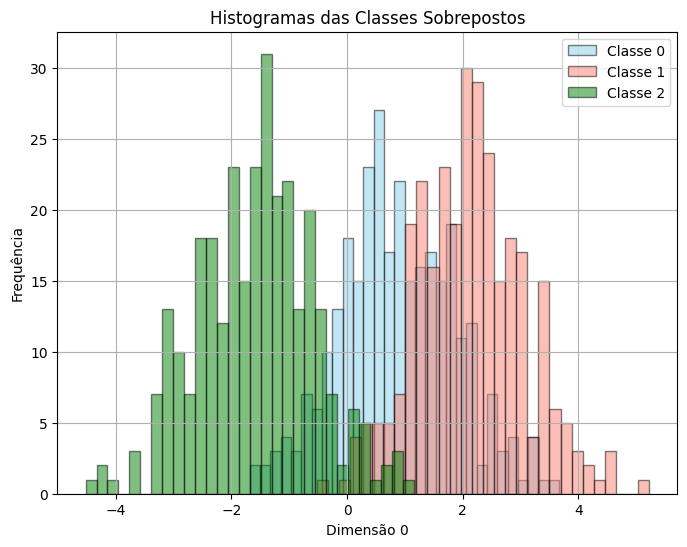

In [461]:
# Plotagem dos histogramas sobrepostos
plt.figure(figsize=(8, 6))

plt.hist(x_class_0[:, 0], bins=30, color='skyblue', alpha=0.5, label='Classe 0', edgecolor='black')
plt.hist(x_class_1[:, 0], bins=30, color='salmon', alpha=0.5, label='Classe 1', edgecolor='black')
plt.hist(x_class_2[:, 0], bins=30, color='green', alpha=0.5, label='Classe 2', edgecolor='black')

plt.xlabel('Dimensão 0')
plt.ylabel('Frequência')
plt.title('Histogramas das Classes Sobrepostos')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2 - Linear Discriminant Analysis

* Use sklearn's implementation of LDA to project the points in a single dimension and then plot the projected data

In [462]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Remember that since we want to project our data onto a vector, the parameter n_components of `LinearDiscriminantAnalysis` should be set to 1

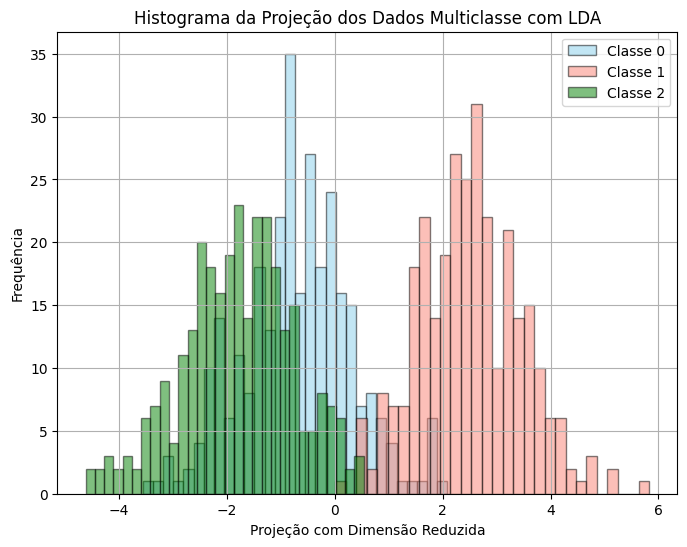

In [463]:
# Criar uma instância do modelo LDA com n_components=1
lda = LinearDiscriminantAnalysis(n_components=1)

# Ajustar o modelo aos dados e transformar os dados para uma única dimensão
x_lda = lda.fit_transform(x_multi, y_multi)

# Cores manualmente escolhidas para cada classe
cores = ['skyblue', 'salmon', 'green']

# Plotar histograma para cada classe com cores manualmente escolhidas
plt.figure(figsize=(8, 6))

# Iterar sobre cada classe e plotar o histograma com a cor correspondente
for label, cor in zip(np.unique(y_multi), cores):
    plt.hist(x_lda[y_multi == label], bins=30, alpha=0.5, label=f'Classe {label}', color=cor, edgecolor='black')

plt.title('Histograma da Projeção dos Dados Multiclasse com LDA')
plt.xlabel('Projeção com Dimensão Reduzida')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()


## Exercise 3 - Calculate test set accuracy

* use the default parameters for the LDA classifier, and report the prediction accuracy on a train/test split of 70/30% (use `random_state=0`)
* report also the accuracy of the `RidgeClassfier` you used in Part I 

In [464]:
from sklearn.model_selection import train_test_split

In [465]:
# Dividir os dados em conjunto de treino e teste (70/30)
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.3, random_state=0)

# Instanciar e treinar o modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

# Instanciar e treinar o modelo RidgeClassifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(x_train, y_train)

# Fazer previsões nos dados de teste
y_pred_lda = lda.predict(x_test)
y_pred_ridge = ridge_classifier.predict(x_test)

# Calcular a precisão das previsões
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

# Imprimir os resultados formatados
print("Test Accuracies:")
print(f"LDA classifier: {accuracy_lda}")
print(f"Ridge Classifier fitting: {accuracy_ridge}")


Test Accuracies:
LDA classifier: 0.937037037037037
Ridge Classifier fitting: 0.9259259259259259


# Part III - Logistic Regression for Binary Classification

## Exercise 1 - Load the dataset

* Load the diabetes dataset (`diabetes.csv`)
* Make a 70/30% train test partition of the dataset

*Suggestion:* I suggest you load it with pandas, but make a scikit-learn style dataset ($X$, $y$ numpy arrays)

In [466]:
# Carregar o conjunto de dados diabetes
diabetes_data = pd.read_csv("diabetes.csv")

# Separar os recursos (X) e os rótulos (y)
x = diabetes_data.drop(columns=['Outcome']).values
y = diabetes_data['Outcome'].values

# Dividir os dados em conjunto de treino e teste (70/30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Excercise 2 - Implementing Logistic Regression

* In this exercise you will implement the logistic regression algorithm to learn the vector of weights $\vec{w}$.
* You will then plot the ROC curve (using your implementation from the Tarefa), and calculate the AUROC (Area Under the ROC curve) using `sklearn.metrics.roc_auc_score()` for the testing set.

You can follow the structure for gradient descent as described in the previous labs and slides. Don't forget to write a function that calculates the sigmoid. You are not allowed in this exercise to use any existing functions.
* **Note that:** in the book and slides `y` is written as `t` and `y_hat` as `y`. 

Remember that $\nabla E(w) = \sum_{n=1}^N (y_n - t_n)\phi_n$ 

* _Tip:_ plot the loss during training to verify that everything is working properly.

In [467]:
# Criando a função da sigmóide
def sigmoid(z):
    """Calculates the sigmoid function."""
    return 1 / (1 + np.exp(-z))

# Criando a função para implementar  a regressão logística
def logistic_regression(X_train, y_train, learning_rate=0.0001, num_iterations=10000):
    """Implementa a regressão logística utilizando gradiente descendente."""
    # Inicializa os pesos
    num_features = X_train.shape[1]
    w = np.zeros(num_features)
    # Lista para armazenar as perdas durante o treinamento
    losses = []
    
    # Gradiente descendente
    for i in range(num_iterations):
        # Calcula os valores previstos
        y_hat = sigmoid(np.dot(X_train, w))
        # Calcula a perda (entropia cruzada)
        loss = -np.mean(y_train * np.log(y_hat) + (1 - y_train) * np.log(1 - y_hat))
        losses.append(loss)
        # Calcula o gradiente
        gradient = np.dot(X_train.T, (y_hat - y_train)) / len(y_train)
        # Atualiza os pesos
        w -= learning_rate * gradient
    
    return w, losses


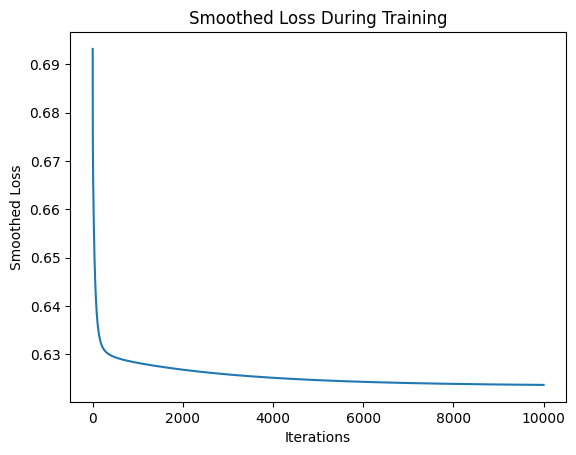

In [468]:
# Train logistic regression model with adjusted learning rate and number of iterations
w, losses = logistic_regression(x_train, y_train)

# Plot the smoothed loss during training
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Smoothed Loss')
plt.title('Smoothed Loss During Training')
plt.show()


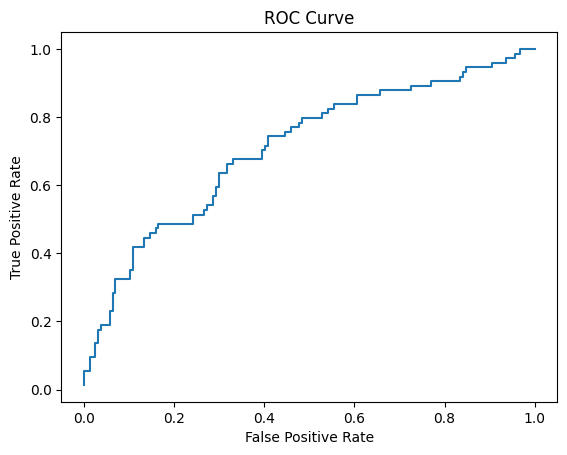

In [469]:
def roc_curve(y_true, y_pred):
    """Calculates the True Positive Rate (TPR) and False Positive Rate (FPR) for different threshold values."""
    thresholds = np.unique(y_pred)
    tpr = []
    fpr = []
    for threshold in thresholds:
        tp = np.sum((y_pred >= threshold) & (y_true == 1))
        fn = np.sum((y_pred < threshold) & (y_true == 1))
        tn = np.sum((y_pred < threshold) & (y_true == 0))
        fp = np.sum((y_pred >= threshold) & (y_true == 0))
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
    return tpr, fpr

# Calculate the predicted probabilities for the testing set
y_pred_test = sigmoid(np.dot(x_test, w))

# Calculate the TPR and FPR for different threshold values
tpr, fpr = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Evaluate the performance of your model, plot the ROC curve and calculate the AUROC

In [470]:
from sklearn.metrics import roc_auc_score

In [471]:
#Calculando o AUROC
auroc = roc_auc_score(y_test, y_pred_test)
print("AUROC:", auroc)


AUROC: 0.7085556894474092


# Part IV - Logistic Regression for multi-class classification

## Exercise 1 - Load the dataset
* Load the famous Iris dataset (using sklearn as shown below)
* Load the data in a matrix $X$ and the target in a vector $y$.
* Make a 70/30% train test partition of the dataset

In [472]:
from sklearn.datasets import load_iris

In [473]:
iris = load_iris()

Prepare $X$ and $y$

In [474]:
# Carregar o conjunto de dados Iris
iris = load_iris()

# Extrair os recursos (features) e os rótulos (labels)
X = iris.data
y = iris.target

Split the data

In [475]:
# Dividir os dados em conjuntos de treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar as formas dos conjuntos de dados
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (105, 4)
Shape of y_train: (105,)
Shape of X_test: (45, 4)
Shape of y_test: (45,)


## Exercise 2 - Train the Logistic Regression model
Train your LogisticRegression multi-class classifier using the sklearn implementation. 
* To use the cross entropy loss function and softmax activation function, the `multi_class` parameter needs to be set to "multinomial"

In [476]:
from sklearn.linear_model import LogisticRegression

In [477]:
lr_iris = LogisticRegression(multi_class='multinomial',solver='newton-cg')

Fit the data

In [478]:
# Criar uma instância do classificador LogisticRegression para classificação multi-classe
lr_iris = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# Treinar o modelo com os dados de treinamento
lr_iris.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

## Exercise 3 - Make predictions and evaluate the model
Use the `predict_proba()` method to obtain the output of the predictions for the testing set. The values are the output of the softmax activation function. 
* Remember that the highest value of each prediction corresponds to the actual predicted class.
* Write a function `get_predicted_class()` that transforms the vector of softmax outputs (obtained from `predict_proba()`) to a vector that just contains the predicted class. 
    - This function takes as input a matrix $\hat{Y}_{proba} \in \mathbb{R}^{m\times k}$ where $m$ is the number of samples in the testing set and $k$ is the number of classes.

As an example: if the softmax output is as follows: `Y_pred_sm = [[0.1,0.2,0.7], [0.4,0.3,0.3]]`, then `get_predicted_class(Y_pred_sm)` should return: `[2,0]` as the highest value for the 1st prediction is class 2 and for the 2nd prediction is class 0.

In [479]:
def get_predicted_class(Y_proba):
    """Transforms the vector of softmax outputs to a vector of predicted classes."""
    # Get the index of the maximum value along each row
    predicted_class = np.argmax(Y_proba, axis=1)
    return predicted_class

In [480]:
# Fazer previsões de probabilidade para o conjunto de teste
y_pred_sm = lr_iris.predict_proba(X_test)

# Obter as classes previstas a partir das previsões de probabilidade
y_pred = get_predicted_class(y_pred_sm)

Now calculate the accuracy in the testing set using `y_pred`

In [481]:
from sklearn.metrics import accuracy_score

# Calcular a precisão no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia calculada da pela função:",accuracy)

# Calcular a precisão manualmente
num_correct = np.sum(y_pred == y_test)
total_samples = len(y_test)
accuracy_manual = num_correct / total_samples
print("Acurácia calculada manualmente:",accuracy_manual)

Acurácia calculada da pela função: 1.0
Acurácia calculada manualmente: 1.0
